In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Se cargan las diferentes dependencias necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

              protected                                                         signature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

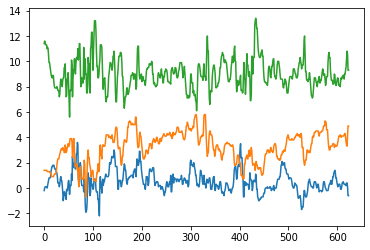

In [ ]:
RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Acelerometro/Testing/walking4.json"
dataframe = pd.read_json(RutaFile)
print(dataframe.to_string()) 
Valores = dataframe.iloc[:,:].values
print(Valores.shape)
print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [ ]:
import os
directory = '/content/gdrive/MyDrive/Colab Notebooks/Datos/Acelerometro/Training/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

Datos=np.zeros((cantidadFiles*624,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  Datos[i*624:(i+1)*624] = DatosOriNP
  i+=1
print(Datos.shape)



(4992, 3)


In [ ]:
print(files)

['seat1.json', 'seat2.json', 'walking1.json', 'walking2.json', 'walking3.json', 'wave1.json', 'wave2.json', 'wave3.json']


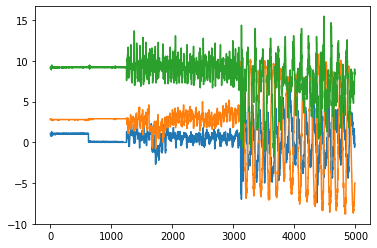

In [ ]:
plt.plot(Datos)

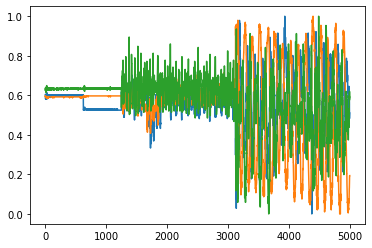

In [ ]:
scaler1 = MinMaxScaler()
scaler1.fit(Datos)
DatosN=scaler1.transform(Datos)
plt.plot(DatosN)

In [ ]:
Xtrain=np.zeros((48,312))

for i in range(48):
    Xtrain[i,:]=np.concatenate((DatosN[i*104:(i+1)*104,0].T,DatosN[i*104:(i+1)*104,1].T,DatosN[i*104:(i+1)*104,2].T),axis=0)

print(Xtrain.shape)


(48, 312)
(48, 312)


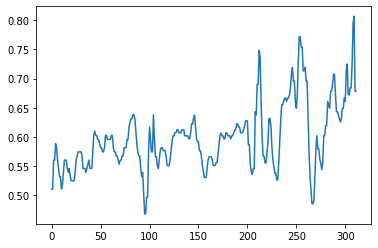

In [ ]:
plt.plot(Xtrain[25,:])

In [ ]:
YtrainIni=np.zeros((48,1))
for i in range(12):
    YtrainIni[i]=0 #Seat

for i in range(12,30):
    YtrainIni[i]=1 # Walking

for i in range(30,48):
    YtrainIni[i]=2 # Wave

print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [ ]:
Ytrain= to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                3130      
                                                                 
 dense_21 (Dense)            (None, 20)                220       
                                                                 
 dense_22 (Dense)            (None, 30)                630       
                                                                 
 dense_23 (Dense)            (None, 3)                 93        
                                                                 
Total params: 4,073
Trainable params: 4,073
Non-trainable params: 0
_________________________________________________________________


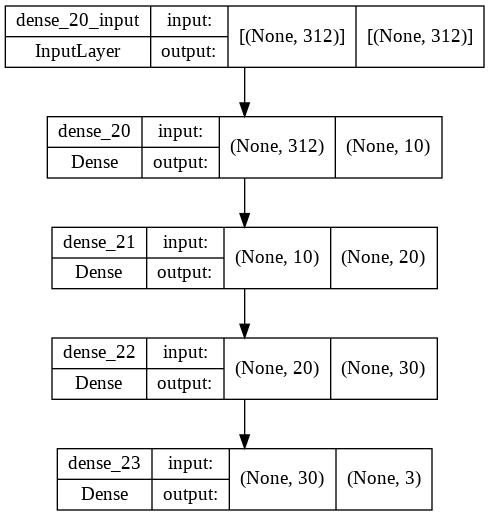

In [ ]:

#Definición del modelo
modelo = Sequential()
modelo.add(Dense(10,input_shape=(312,),activation='relu'))
modelo.add(Dense(20,activation='relu'))
modelo.add(Dense(30,activation='relu'))
modelo.add(Dense(3, activation = 'softmax'))

modelo.summary()

keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelo.fit(Xtrain,Ytrain, epochs=500,batch_size=None)


Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3885 - accuracy: 0.8125
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3348 - accuracy: 0.8333
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 0.4610 - accuracy: 0.7708
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 0.3119 - accuracy: 0.8333
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 0.2153 - accuracy: 0.9583
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 0.3493 - accuracy: 0.7500
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 0.2042 - accuracy: 0.9167
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 0.2350 - accuracy: 0.8958
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 0.2282 - accuracy: 0.8958
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 0.2014 - accuracy: 0.9375
Epoch 11/500
2/2 [==========

2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 1.0000


[0.006879983004182577, 1.0]

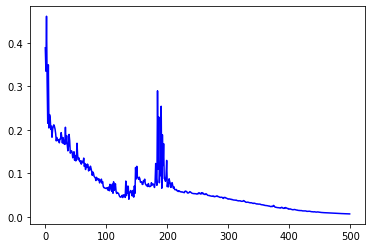

In [ ]:
plt.plot(history.history["loss"],'b')
modelo.evaluate(Xtrain, Ytrain)

['seat3.json', 'walking4.json', 'wave4.json']
(1872, 3)


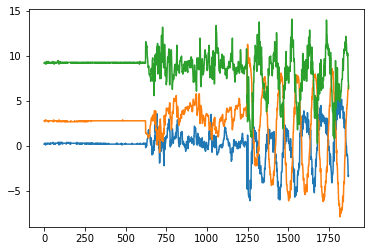

In [ ]:
import os
directory = '/content/gdrive/MyDrive/Colab Notebooks/Datos/Acelerometro/Testing/'
files = os.listdir(directory)
files.sort()
print(files)
cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles*624,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  DatosVal[i*624:(i+1)*624] = DatosOriNP
  i+=1
print(DatosVal.shape)
plt.plot(DatosVal)

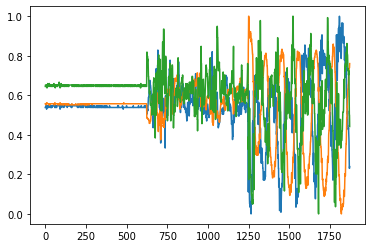

In [ ]:
scaler3 = MinMaxScaler()
scaler3.fit(DatosVal)
DatosValN=scaler3.transform(DatosVal)
plt.plot(DatosValN)

In [ ]:
XVal=np.zeros((18,312))
for i in range(18):
    XVal[i,:]=np.concatenate((DatosValN[i*104:(i+1)*104,0].T,DatosValN[i*104:(i+1)*104,1].T,DatosValN[i*104:(i+1)*104,2].T),axis=0)

print(XVal.shape)



(18, 312)


'XVal=np.zeros((18,104,3))\n\nfor i in range(18):\n    XVal[i,:,0]=DatosValN[i*104:(i+1)*104,0].T\n    XVal[i,:,1]=DatosValN[i*104:(i+1)*104,1].T\n    XVal[i,:,2]=DatosValN[i*104:(i+1)*104,2].T\n\nprint(XVal.shape)'

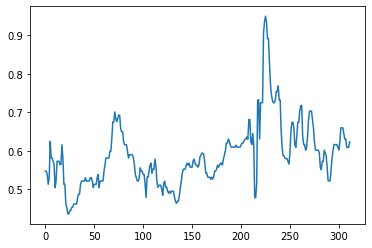

In [ ]:
plt.plot(XVal[10,:])

In [ ]:
YValIni=np.zeros((18,1))
for i in range(6):
    YValIni[i]=0

for i in range(6,12):
    YValIni[i]=1

for i in range(12,18):
    YValIni[i]=2   

print(YValIni)
YVal= to_categorical(YValIni)

print(YVal)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
modelo.evaluate(XVal, YVal)

1/1 [==============================] - 0s 23ms/step - loss: 0.0741 - accuracy: 0.9444


[0.07406029105186462, 0.9444444179534912]

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         6

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18

[[6 0 0]
 [1 5 0]
 [0 0 6]]


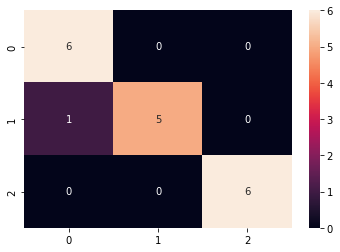

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")